<a href="https://colab.research.google.com/github/harshitha020505/DLLAB/blob/main/DLLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implement an MLP by varying bias, weights, and learning rate, and record observations for different
#learning rate values. Plot a graph showing the relationship between loss (error) and learning rate.

Learning Rate: 0.01, Final Loss: 0.240571
Learning Rate: 0.05, Final Loss: 0.012541
Learning Rate: 0.1, Final Loss: 0.002546
Learning Rate: 0.5, Final Loss: 0.000293
Learning Rate: 1.0, Final Loss: 0.000135


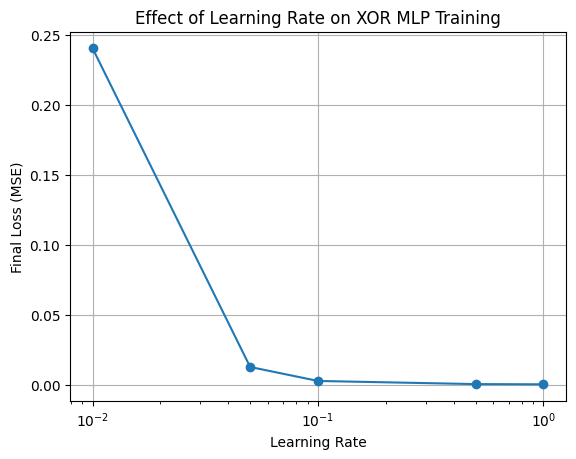

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
  return x*(1-x)
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])
learning_rates=[0.01, 0.05, 0.1, 0.5, 1.0]
final_losses=[]
epochs=10000
for lr in learning_rates:
  np.random.seed(42)
  W1 = np.random.rand(2, 2)
  b1 = np.random.rand(1, 2)
  W2 = np.random.rand(2, 1)
  b2 = np.random.rand(1, 1)
  for epoch in range(epochs):
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    y_pred = sigmoid(final_input)
    error = y - y_pred
    loss = np.mean(error ** 2)
    d_output = error * sigmoid_derivative(y_pred)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        # Update weights and biases
    W2 += hidden_output.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr

    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr
  final_losses.append(loss)
  print(f"Learning Rate: {lr}, Final Loss: {loss:.6f}")
plt.figure()
plt.plot(learning_rates, final_losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss (MSE)")
plt.title("Effect of Learning Rate on XOR MLP Training")
plt.xscale("log")
plt.grid(True)
plt.show()